# Machine Predictive Maintenance

In [1]:
import pandas as pd
import numpy as np

#to plot the data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

import re
import time
import os
import glob

import warnings
warnings.filterwarnings('ignore')

In [2]:
files = glob.glob(pathname="C:/Data/Tagup/exampleco_data/machine_*.csv")
files

['C:/Data/Tagup/exampleco_data\\machine_0.csv',
 'C:/Data/Tagup/exampleco_data\\machine_1.csv',
 'C:/Data/Tagup/exampleco_data\\machine_10.csv',
 'C:/Data/Tagup/exampleco_data\\machine_11.csv',
 'C:/Data/Tagup/exampleco_data\\machine_12.csv',
 'C:/Data/Tagup/exampleco_data\\machine_13.csv',
 'C:/Data/Tagup/exampleco_data\\machine_14.csv',
 'C:/Data/Tagup/exampleco_data\\machine_15.csv',
 'C:/Data/Tagup/exampleco_data\\machine_16.csv',
 'C:/Data/Tagup/exampleco_data\\machine_17.csv',
 'C:/Data/Tagup/exampleco_data\\machine_18.csv',
 'C:/Data/Tagup/exampleco_data\\machine_19.csv',
 'C:/Data/Tagup/exampleco_data\\machine_2.csv',
 'C:/Data/Tagup/exampleco_data\\machine_3.csv',
 'C:/Data/Tagup/exampleco_data\\machine_4.csv',
 'C:/Data/Tagup/exampleco_data\\machine_5.csv',
 'C:/Data/Tagup/exampleco_data\\machine_6.csv',
 'C:/Data/Tagup/exampleco_data\\machine_7.csv',
 'C:/Data/Tagup/exampleco_data\\machine_8.csv',
 'C:/Data/Tagup/exampleco_data\\machine_9.csv']

In [3]:
def prepare_data(files_list):
    
    columns_names =  ['datetime', 'sensor1', 'sensor2', 'sensor3', 'sensor4']
    
    df = pd.DataFrame(columns = ['machine'] + columns_names)
    
    for file in files_list:
        df_i = pd.read_csv(file, skiprows = 1, names = columns_names)
        df_i['machine'] = int(re.findall(r'\d+', file)[0])
        df = df.append(df_i, sort = True, ignore_index = True)
    
    df.datetime = pd.to_datetime(df.datetime)
    df = df.sort_values(by = ['machine', 'datetime'])
    df = df.reset_index(drop = True)
    
    return df

In [4]:
df = prepare_data(files)
df.head()

,datetime,machine,sensor1,sensor2,sensor3,sensor4
0,2019-01-01 00:00:00.000000000,0,12.626096,8.803120,-11.809200,10.083961
1,2019-01-01 08:00:09.603201067,0,10.831994,2.816327,11.554778,21.892853
2,2019-01-01 16:00:19.206402134,0,21.083510,-0.672645,-17.839178,-1.349024
3,2019-01-02 00:00:28.809603201,0,32.294495,6.525132,-13.498586,-4.250752
4,2019-01-02 08:00:38.412804268,0,28.057100,3.691359,21.984744,13.670561


In [5]:
df.tail()

,datetime,machine,sensor1,sensor2,sensor3,sensor4
59995,2021-09-25 15:59:21.587195728,19,0.002403,0.013519,0.002612,0.005599
59996,2021-09-25 23:59:31.190396800,19,0.023516,-0.004443,0.011515,0.009060
59997,2021-09-26 07:59:40.793597872,19,0.002002,-0.008331,-0.002329,-0.005856
59998,2021-09-26 15:59:50.396798944,19,-0.004232,-0.011988,-0.003764,-0.005268
59999,2021-09-27 00:00:00.000000000,19,-0.008622,0.006749,-250.001385,0.012326


In [6]:
df.shape

(60000, 6)

In [7]:
df.machine.unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19], dtype=object)

There are total 20 unique multivariate timeseries of 20 machines consisting 4 different sensor values and timestamp. Each machine has total 3000 records starting from 2019-01-01 to 2021-09-27. Every 8 hour one data point is recorded.

### Train Test split

Splitting the data first so there would not be any data leakage. Considering 80%-20% train-test split.

In [8]:
df_train = df[(df.machine >= 0) & (df.machine <= 15)]
df_test = df[df.machine > 15]

df_train.shape, df_test.shape

((48000, 6), (12000, 6))

### Analysis

Considering a sample machine 0

In [9]:
df_0 = df_train[df_train.machine == 0]

In [10]:
df_0.head()

,datetime,machine,sensor1,sensor2,sensor3,sensor4
0,2019-01-01 00:00:00.000000000,0,12.626096,8.803120,-11.809200,10.083961
1,2019-01-01 08:00:09.603201067,0,10.831994,2.816327,11.554778,21.892853
2,2019-01-01 16:00:19.206402134,0,21.083510,-0.672645,-17.839178,-1.349024
3,2019-01-02 00:00:28.809603201,0,32.294495,6.525132,-13.498586,-4.250752
4,2019-01-02 08:00:38.412804268,0,28.057100,3.691359,21.984744,13.670561


In [11]:
df_0.tail()

,datetime,machine,sensor1,sensor2,sensor3,sensor4
2995,2021-09-25 15:59:21.587195728,0,0.004364,-0.010959,-0.007210,0.012390
2996,2021-09-25 23:59:31.190396800,0,0.004077,0.000165,-0.003772,0.010053
2997,2021-09-26 07:59:40.793597872,0,0.007702,-0.014708,-0.011722,0.001334
2998,2021-09-26 15:59:50.396798944,0,-0.008149,0.000107,-0.017914,0.010599
2999,2021-09-27 00:00:00.000000000,0,0.003465,0.023451,0.012463,0.013997


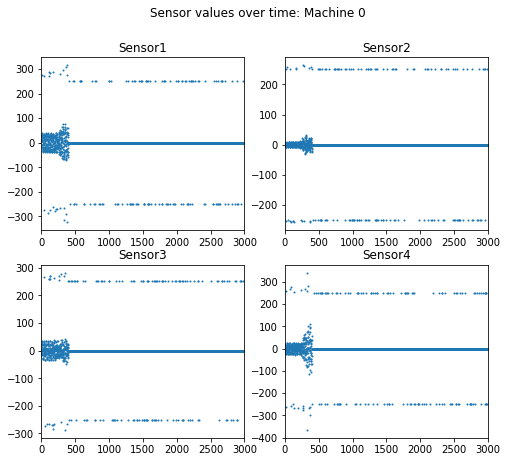

In [12]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (8, 7))
ax = axes.ravel()

plt.suptitle('Sensor values over time: Machine 0')

df_0.sensor1.plot(marker='o', linestyle= 'None', ax = ax[0], markersize = 1, title = 'Sensor1')
df_0.sensor2.plot(marker='o', linestyle= 'None', ax = ax[1], markersize = 1, title = 'Sensor2')
df_0.sensor3.plot(marker='o', linestyle= 'None', ax = ax[2], markersize = 1, title = 'Sensor3')
df_0.sensor4.plot(marker='o', linestyle= 'None', ax = ax[3], markersize = 1, title = 'Sensor4')

plt.show()

#### Sensor 1 for all training data

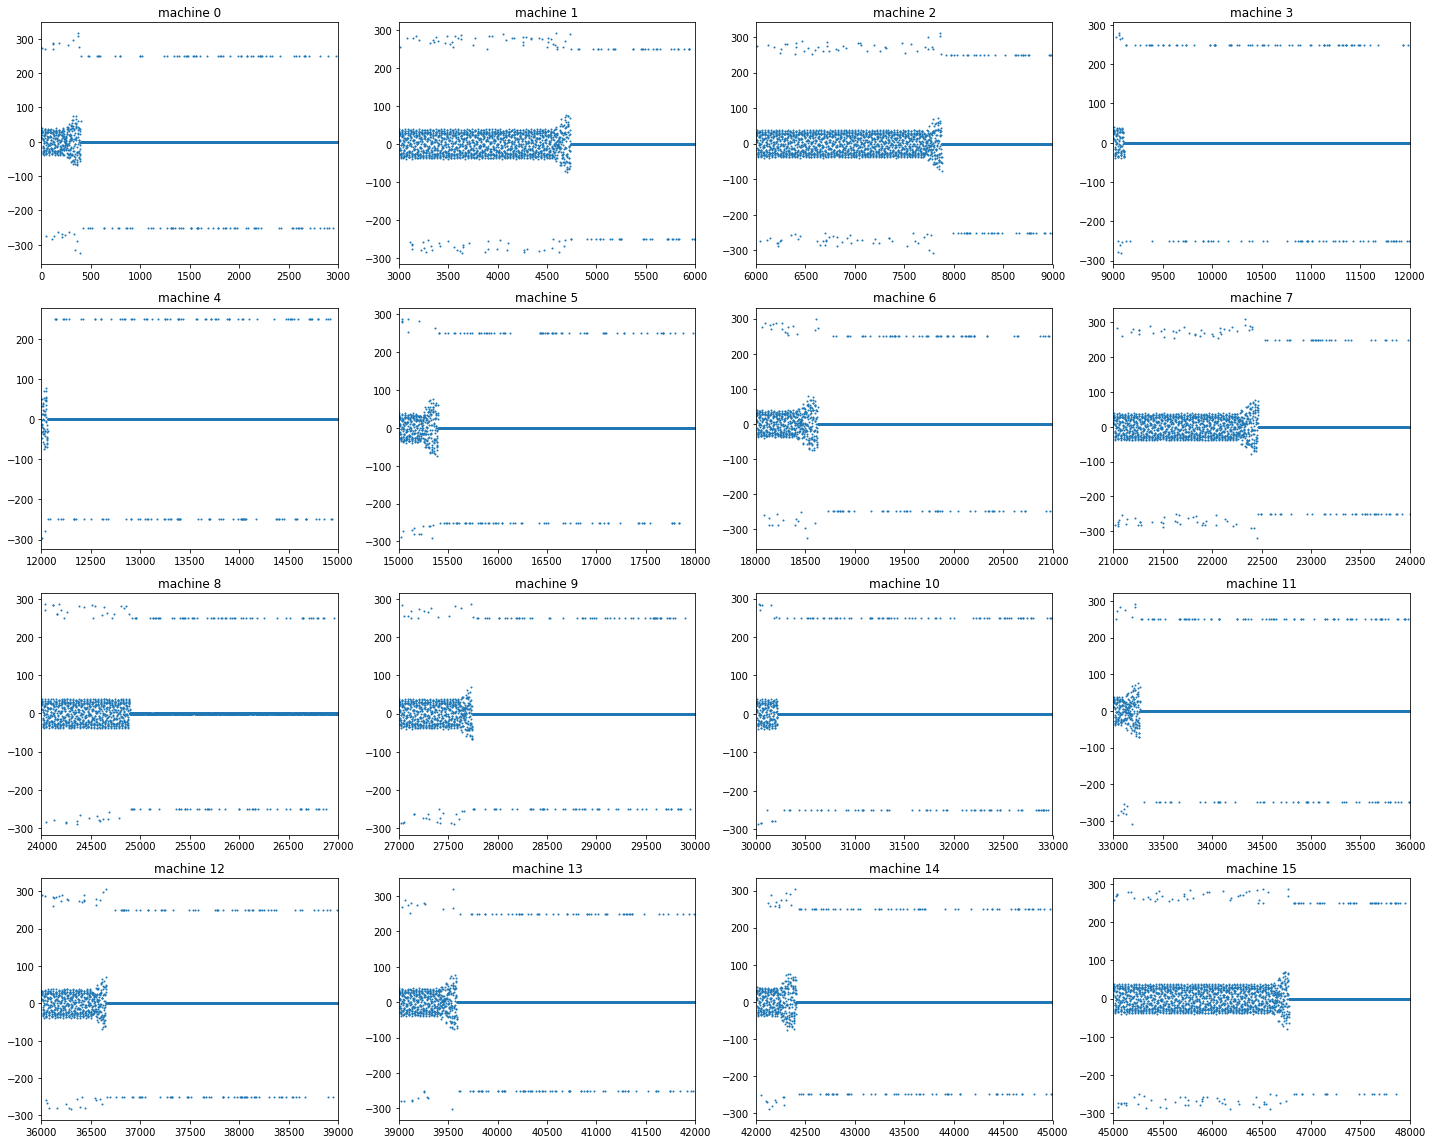

In [13]:
fig, axes = plt.subplots(nrows = 4, ncols = 4, figsize = (20, 16))
ax = axes.ravel()

for i in range(0, 16):
    df_train.sensor1[df_train.machine == i].plot(marker='o', linestyle= 'None', markersize = 1, ax = ax[i], 
                                                 title = 'machine ' + str(i))

plt.tight_layout()
plt.show()

#### Sensor 2 for all training data

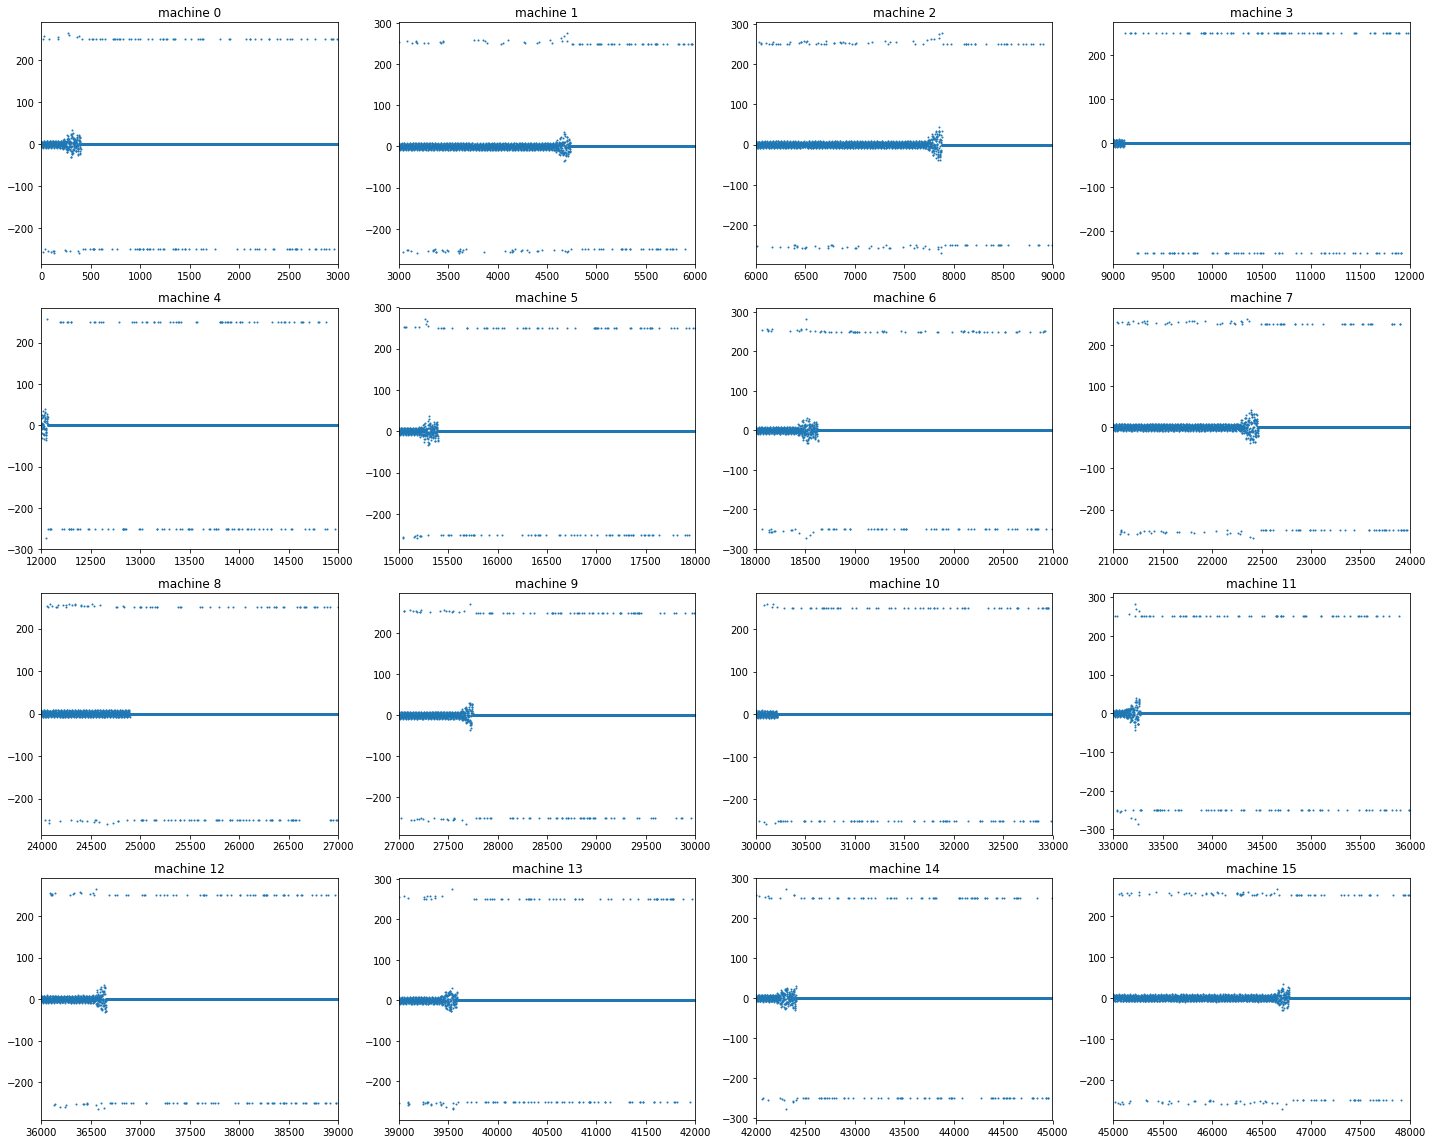

In [14]:
fig, axes = plt.subplots(nrows = 4, ncols = 4, figsize = (20, 16))
ax = axes.ravel()

for i in range(0, 16):
    df_train.sensor2[df_train.machine == i].plot(marker='o', linestyle= 'None', markersize = 1, ax = ax[i], 
                                                 title = 'machine ' + str(i))

plt.tight_layout()
plt.show()

#### Sensor 3 for all training data

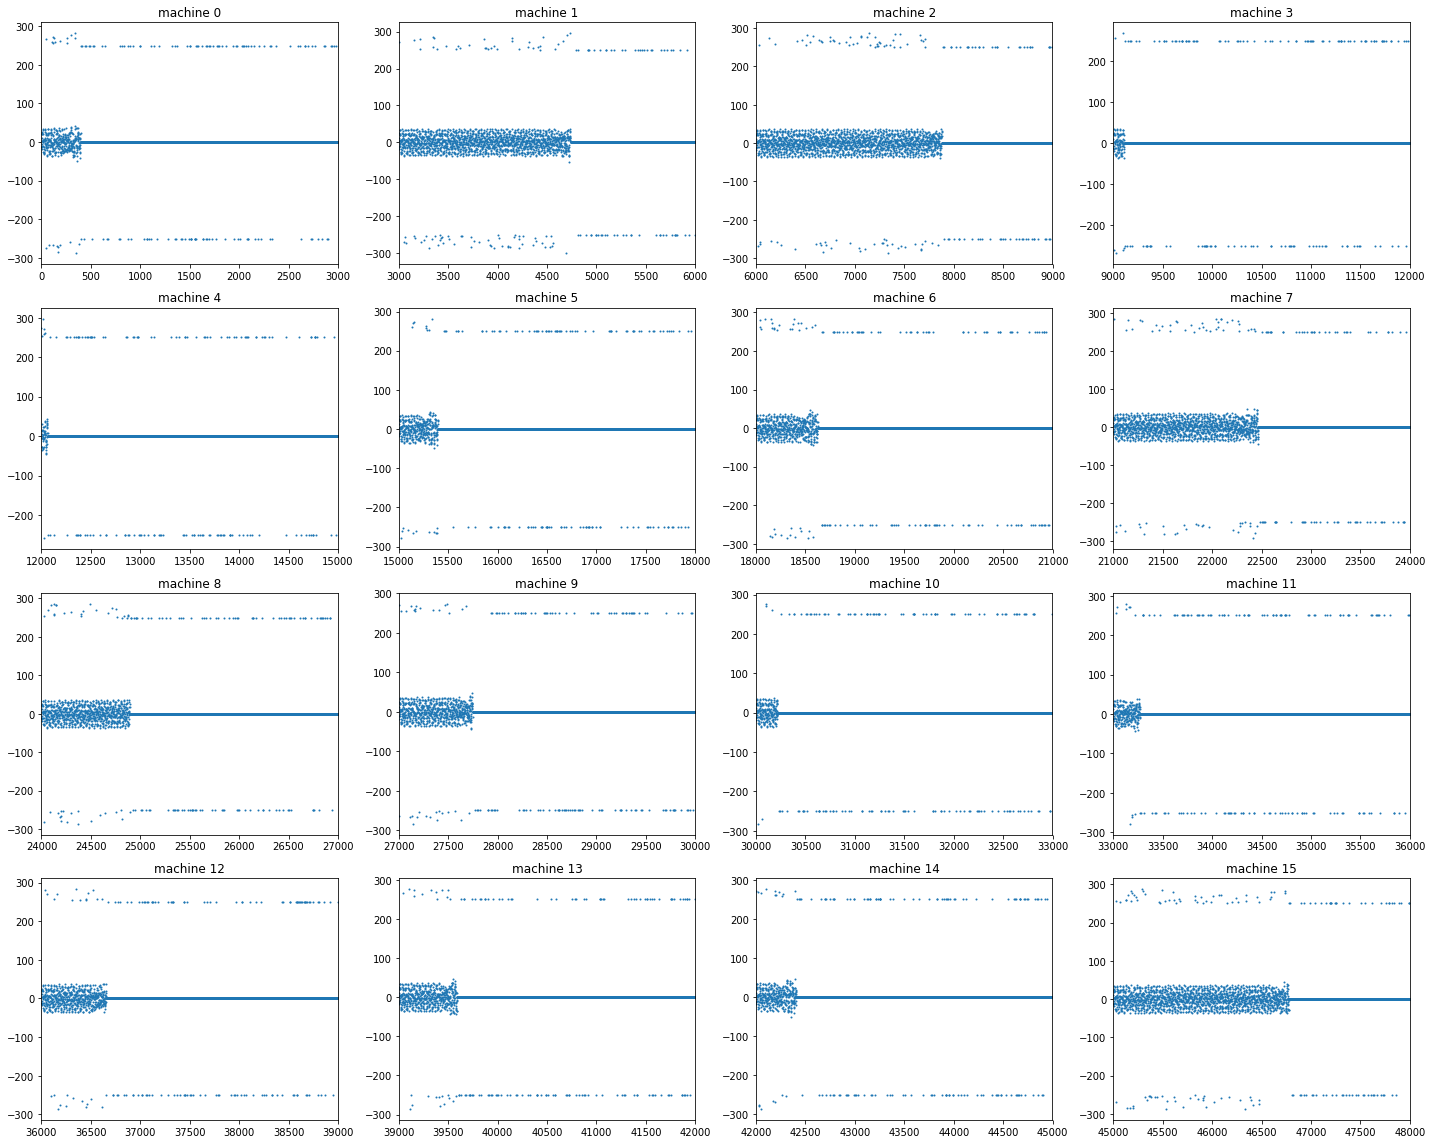

In [15]:
fig, axes = plt.subplots(nrows = 4, ncols = 4, figsize = (20, 16))
ax = axes.ravel()

for i in range(0, 16):
    df_train.sensor3[df_train.machine == i].plot(marker='o', linestyle= 'None', markersize = 1, ax = ax[i], 
                                                 title = 'machine ' + str(i))

plt.tight_layout()
plt.show()

#### Sensor 4 for all training data

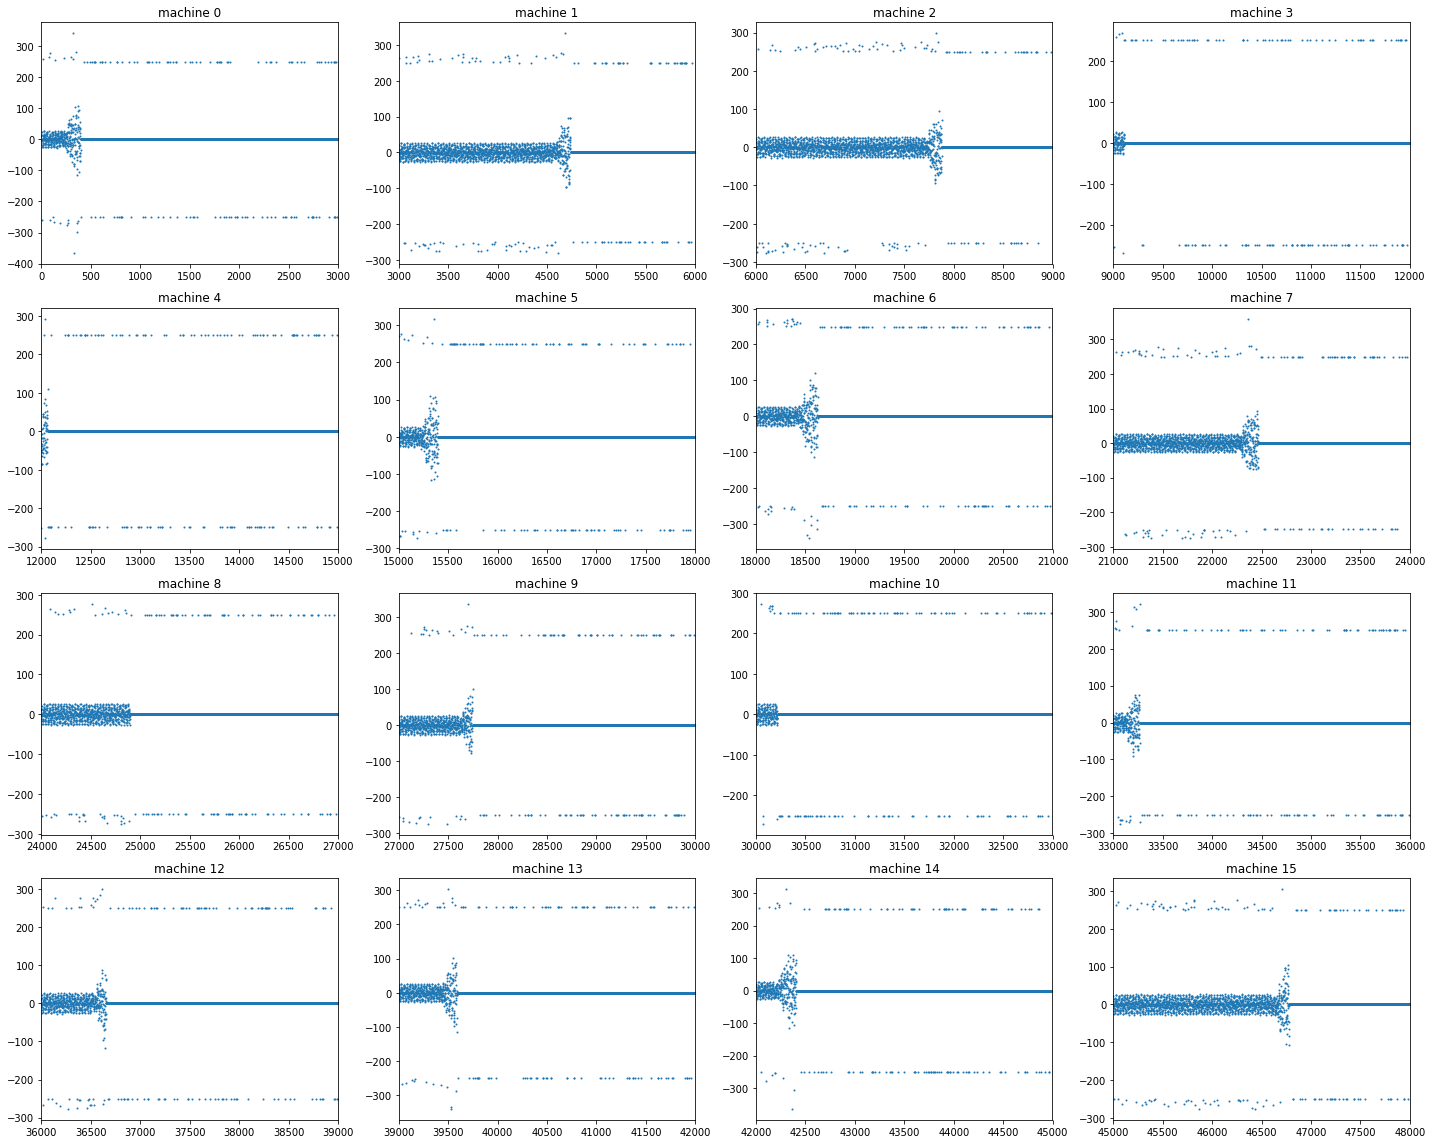

In [16]:
fig, axes = plt.subplots(nrows = 4, ncols = 4, figsize = (20, 16))
ax = axes.ravel()

for i in range(0, 16):
    df_train.sensor4[df_train.machine == i].plot(marker='o', linestyle= 'None', markersize = 1, ax = ax[i], 
                                                 title = 'machine ' + str(i))

plt.tight_layout()
plt.show()

### Prognosis

As we can see there are obvious outliers in the dataframe. We see that when the machine goes into faulty state, the variance increases. I would like to build a rule-based model. The steps for my prognostics approach are given below.

1. Marking outliers considering X-bar control chart. i.e. 3-sigma limits
2. Imputing outliers using rolling averages considering window size as 5
3. Finding first two eigen values using principal component analysis
4. Taking square of both eigen values and adding them to make a degradation index
5. Finding rolling standard deviation with window size as 5
6. Based on the rolling standard deviation finding a threshold and marking the machine as failed when it goes beyond predefined threshold

In [17]:
sensors = ['sensor1', 'sensor2', 'sensor3', 'sensor4']

#### Step 1

In [18]:
def limits(data, sigma = 3):
    xbar = data.mean()
    ucl = xbar + 3 * data.std()
    lcl = xbar - 3 * data.std()
    return lcl, ucl

In [19]:
limit_df = pd.DataFrame(columns = ['sensor', 'lower_limit', 'upper_limit'])

for col in sensors:
    l, u = limits(df_train[col].values)
    limit_df = limit_df.append({'sensor': col, 'lower_limit': l, 'upper_limit': u}, ignore_index = True)
    df_train.loc[(df_train[col] < l) | (df_train[col] > u), col] = np.nan

limit_df

,sensor,lower_limit,upper_limit
0,sensor1,-173.871176,174.539642
1,sensor2,-166.975519,166.348183
2,sensor3,-170.596994,171.096804
3,sensor4,-169.843272,170.535603


For machine 0, checking upper and lower limits

In [20]:
sensors

['sensor1', 'sensor2', 'sensor3', 'sensor4']

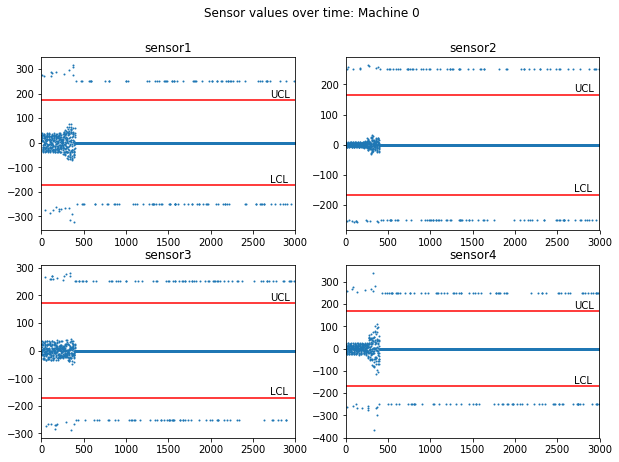

In [21]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 7))
ax = axes.ravel()

plt.suptitle('Sensor values over time: Machine 0')

for i, col in enumerate(sensors):
    df_0[col].plot(marker='o', linestyle= 'None', ax = ax[i], markersize = 1, title = col)
    ax[i].axhline(limit_df.lower_limit[limit_df.sensor == col].values[0], color='r')
    ax[i].axhline(limit_df.upper_limit[limit_df.sensor == col].values[0], color='r')
    ax[i].text(2700, limit_df.lower_limit[limit_df.sensor == col].values[0] + 10,'LCL',rotation=0)
    ax[i].text(2700, limit_df.upper_limit[limit_df.sensor == col].values[0] + 10,'UCL',rotation=0)

plt.show()

#### Step 2

In [22]:
df_train[sensors] = df_train[sensors].fillna(df_train[sensors].rolling(min_periods=1, center=True, window=5).mean())

In [23]:
df_train.isnull().sum()

datetime    0
machine     0
sensor1     0
sensor2     0
sensor3     0
sensor4     0
dtype: int64

#### Step 3

In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

pca_df_train = pd.DataFrame(data = pca.fit_transform(df_train[sensors]), columns = ['pc1', 'pc2'])
pca_df_train['machine'] = df_train.machine

In [25]:
pca_df_train.head()

,pc1,pc2,machine
0,7.637595,-4.900492,0
1,7.905512,-25.796283,0
2,17.362071,7.372804,0
3,29.246979,6.587874,0
4,27.971551,-25.157680,0


Visualizing principal components of machine 0

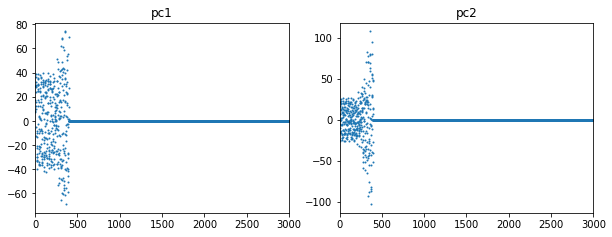

In [26]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 3.5))
pca_df_train.pc1[pca_df_train.machine == 0].plot(marker='o', linestyle= 'None', ax = ax[0], markersize = 1, title = 'pc1')
pca_df_train.pc2[pca_df_train.machine == 0].plot(marker='o', linestyle= 'None', ax = ax[1], markersize = 1, title = 'pc2')
plt.show()

scatter plot between pc1 and pc2

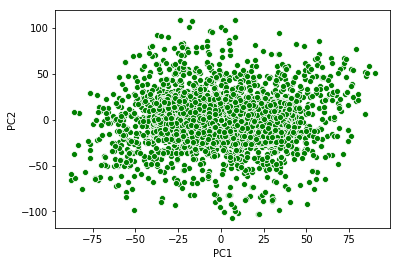

In [27]:
sns.scatterplot(pca_df_train.pc1, pca_df_train.pc2, color = 'green')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

#### Step 4

In [28]:
pca_df_train['degradation_index'] = pca_df_train.pc1*pca_df_train.pc1 + pca_df_train.pc2*pca_df_train.pc2

Visualizing degradation index of all machines

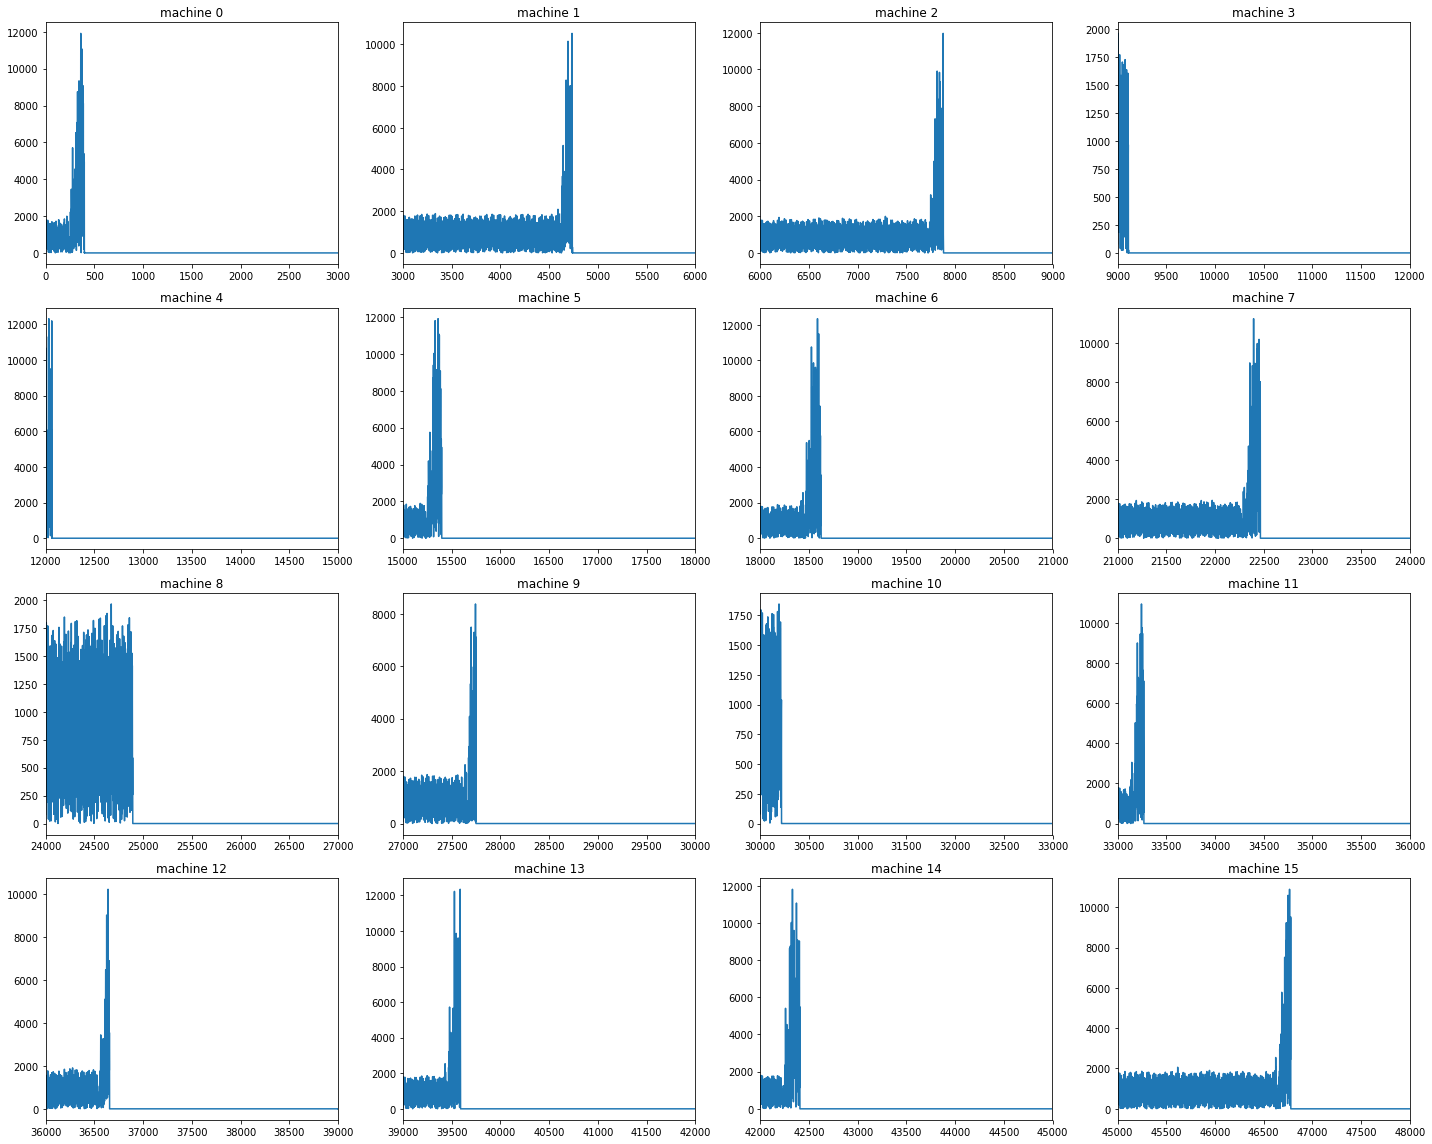

In [29]:
fig, axes = plt.subplots(nrows = 4, ncols = 4, figsize = (20, 16))
ax = axes.ravel()

for i in range(0, 16):
    pca_df_train.degradation_index[pca_df_train.machine == i].plot(ax = ax[i], title = 'machine ' + str(i))

plt.tight_layout()
plt.show()

#### Step 5

filling null values with succeeding values

In [30]:
pca_df_train['rolling_std_index'] = pca_df_train.groupby('machine')['degradation_index'].rolling(window = 5).std().\
                                                                                    reset_index(drop = True)
pca_df_train['rolling_std_index'] = pca_df_train['rolling_std_index'].bfill()

Visualizing rolling standard deviation of degradation index of all machines

Considering failure throshold as 750

In [31]:
failure_threshold = 750

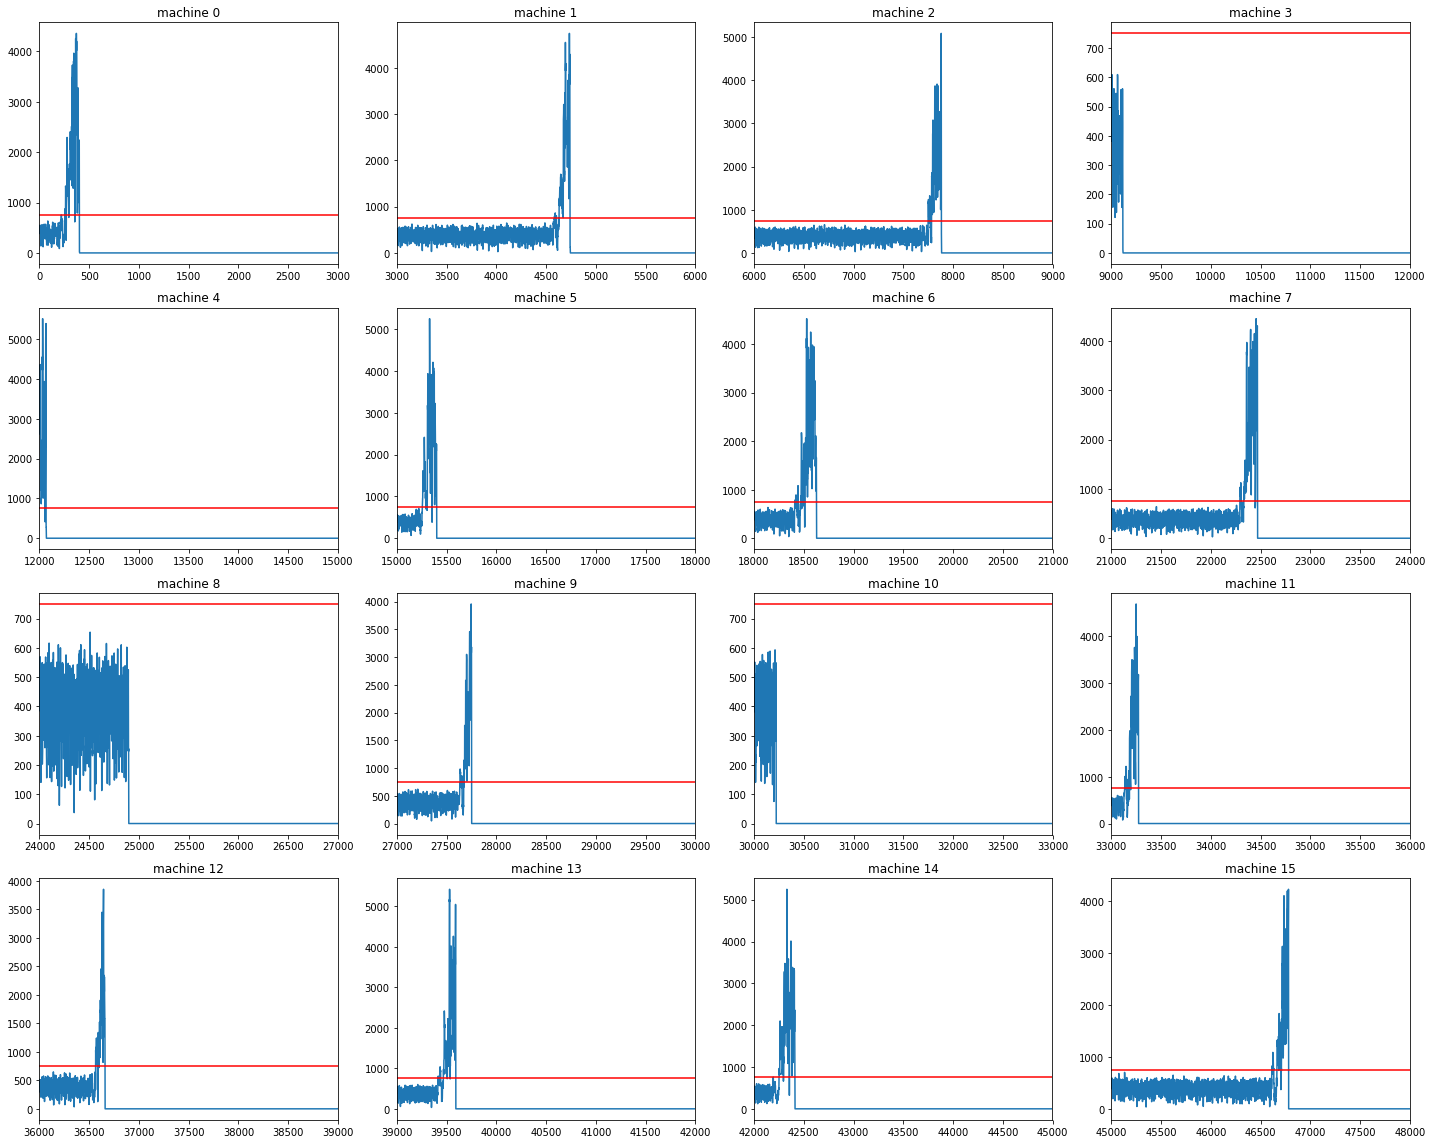

In [32]:
fig, axes = plt.subplots(nrows = 4, ncols = 4, figsize = (20, 16))
ax = axes.ravel()

for i in range(0, 16):
    pca_df_train.rolling_std_index[pca_df_train.machine == i].plot(ax = ax[i], title = 'machine ' + str(i))
    ax[i].axhline(failure_threshold, color = 'red')

plt.tight_layout()
plt.show()

It looks like the threshold is well defined and it generalizes well for all machines except machine 3, 8 and 10

### Checking the approach on Test data

In [33]:
failure_threshold

750

In [34]:
def failure_prediction(data, threshold, ax):
    
    data = data.reset_index(drop = True)
    machine = data.machine.values[0]
    
    for col in sensors:
        l = limit_df.lower_limit[limit_df.sensor == col].values[0]
        u = limit_df.upper_limit[limit_df.sensor == col].values[0]
    
        data.loc[(data[col] < l) | (data[col] > u), col] = np.nan
    
    data[sensors] = data[sensors].fillna(data[sensors].rolling(min_periods=1, center=True, window=5).mean())

    pca_df_test = pd.DataFrame(data = pca.transform(data[sensors]), columns = ['pc1', 'pc2'])
    pca_df_test['machine'] = data.machine

    pca_df_test['degradation_index'] = pca_df_test.pc1*pca_df_test.pc1 + pca_df_test.pc2*pca_df_test.pc2

    pca_df_test['rolling_std_index'] = pca_df_test['degradation_index'].rolling(window = 5).std().\
                                                                                reset_index(drop = True)
    pca_df_test['rolling_std_index'] = pca_df_test['rolling_std_index'].bfill()
    
    failure = pca_df_test.index[pca_df_test.rolling_std_index >= threshold].min()
    
    a = pca_df_test.rolling_std_index.plot(title = 'machine ' + str(machine), ax = ax)
    ax.axhline(threshold, color = 'red')
    ax.axvline(failure, color = 'green')

    ax.text(failure, pca_df_test.rolling_std_index.max() , ' failure starts at cycle ' + str(failure), color = 'green')
    return a

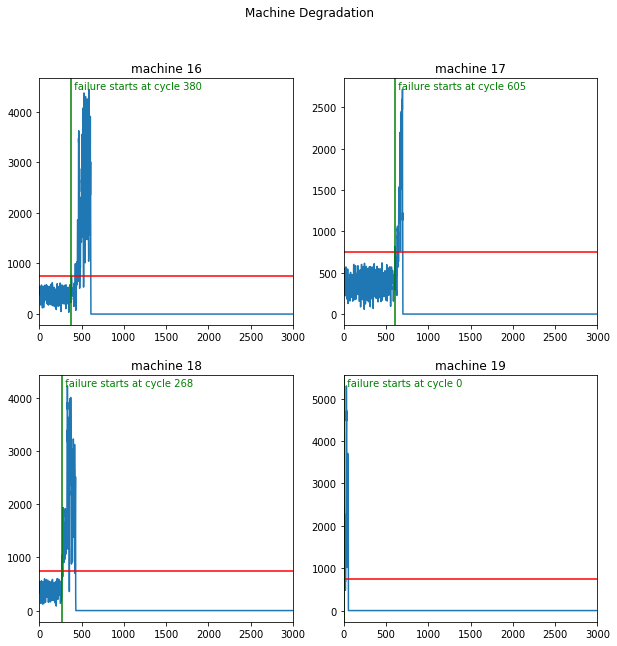

In [35]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10,10))
ax = axes.ravel()

for i, m in enumerate(df_test.machine.unique()):
    failure_prediction(df_test[df_test.machine == m], failure_threshold, ax[i])

plt.suptitle('Machine Degradation')
plt.show()